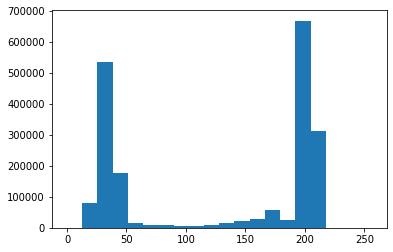

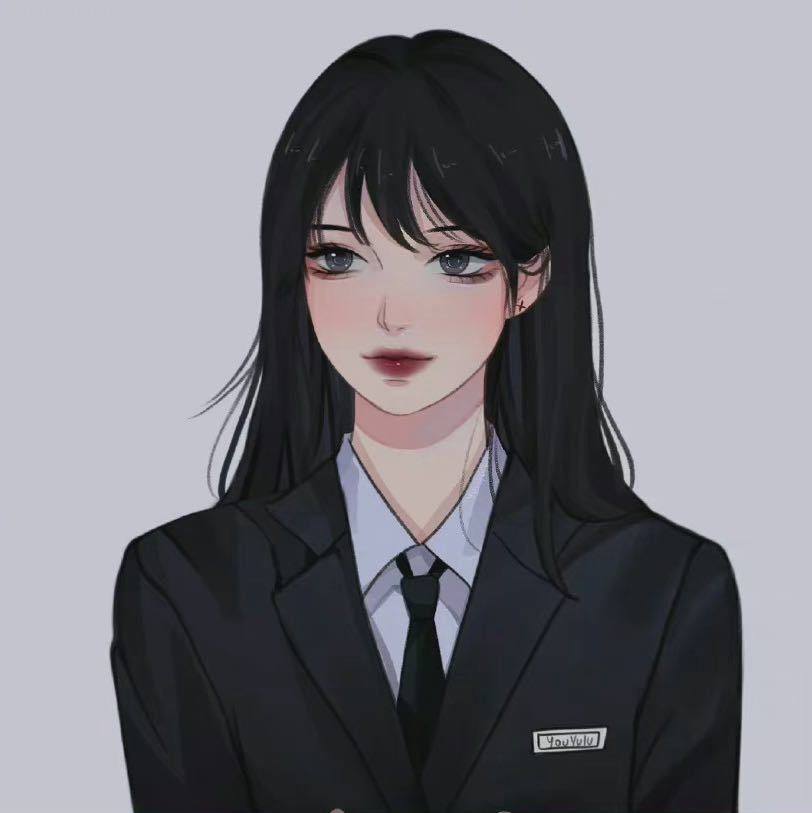

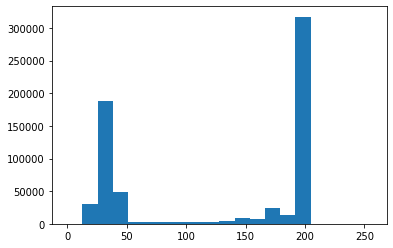

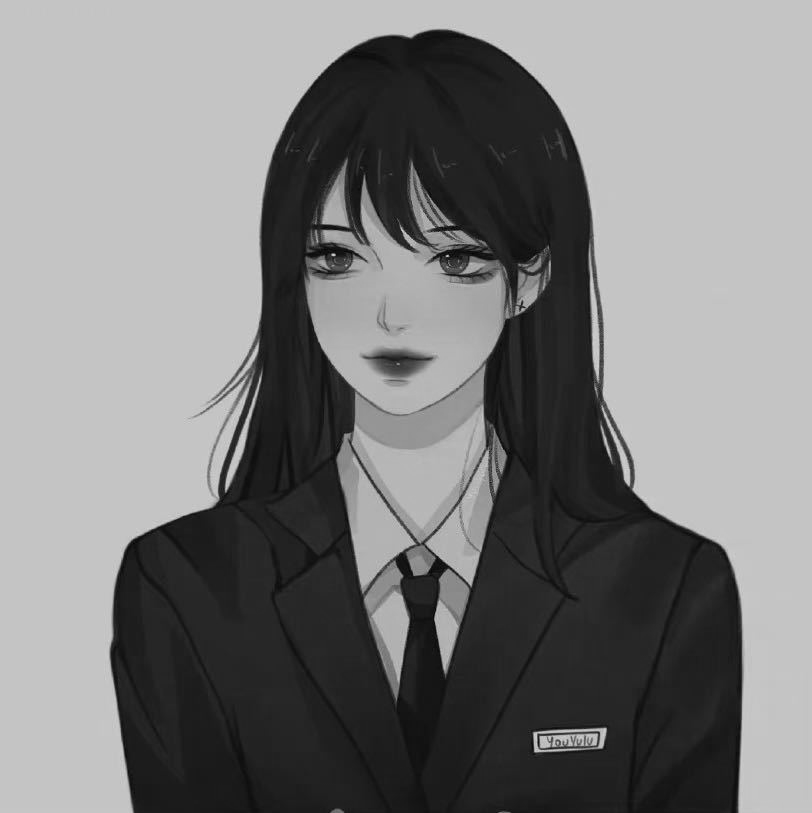

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


类间方差最大阈值： 113


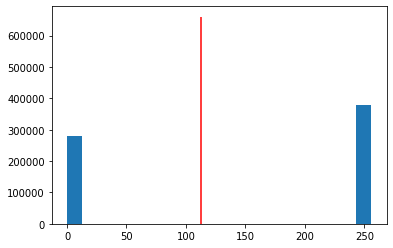

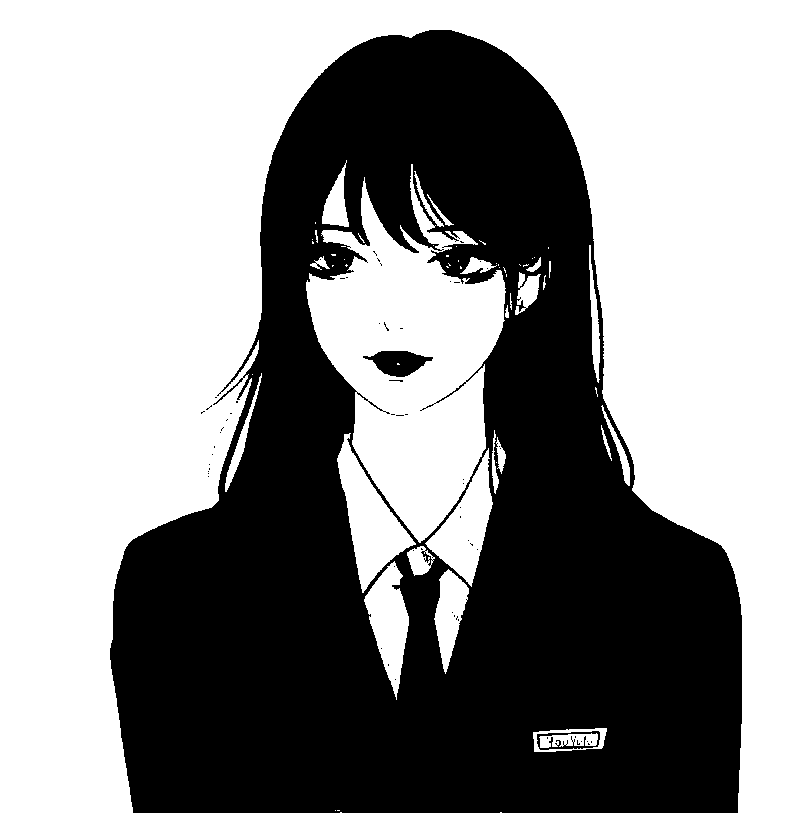

In [43]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

def Histogram(img):
  plt.hist(img.ravel(), 20, [0, 256])
  plt.show()
  return img

def bgr2gray(img):
    b = img[:, :, 0].copy()
    g = img[:, :, 1].copy()
    r = img[:, :, 2].copy()

    gray_img = 0.2126 * r + 0.7152 * g + 0.0722 * b
    gray_img = gray_img.astype(np.uint8)

    Histogram(gray_img)

    return gray_img

def otsu(gray_img):
    h = gray_img.shape[0]
    w = gray_img.shape[1]
    threshold_t = 0
    max_g = 0
    
    for t in range(255):
        n0 = gray_img[np.where(gray_img < t)]
        n1 = gray_img[np.where(gray_img >= t)]
        w0 = len(n0) / (h * w)
        w1 = len(n1) / (h * w)
        u0 = np.mean(n0) if len(n0) > 0 else 0.
        u1 = np.mean(n1) if len(n0) > 0 else 0.
        
        g = w0 * w1 * (u0 - u1) ** 2
        if g > max_g:
            max_g = g
            threshold_t = t
    print('类间方差最大阈值：', threshold_t)

    gray_img[gray_img < threshold_t] = 0
    gray_img[gray_img >= threshold_t] = 255

    plt.vlines(threshold_t,[len(n0),len(n1)][len(n1)<len(n0)],[len(n0),len(n1)][len(n1)>len(n0)],colors = "r", linestyles = "solid")
    Histogram(gray_img)

    return gray_img



if __name__ == '__main__':
  img = cv2.imread('10.jpg').astype(np.float32)
  Histogram(img)
  cv2_imshow(img)

  gray_img = bgr2gray(img)
  cv2_imshow(gray_img)

  otsu_img = otsu(gray_img)
  cv2_imshow(otsu_img)

  cv2.waitKey(0)
  cv2.destroyAllWindows()
